## REGRESION LOGISTICA

### ANDERSON ANDREY QUITIAN PEREZ

In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#Lectura de datos crear variable
Datos = pd.read_csv('C:/BD/heart_cleveland_upload.csv')

In [5]:
#Lectura de datos y análisis correspondiente 
Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [7]:
# Descripción Media,mediana,moa,etc...
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Análisis de datos atípicos del colesterol ')

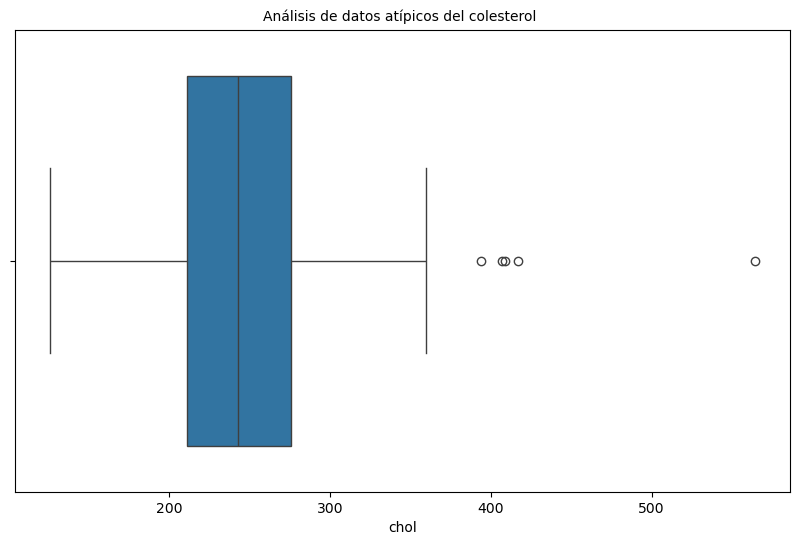

In [15]:
#Datos faltantes y atípicos 
plt.figure(figsize=(10, 6))
sns.boxplot(x=Datos['chol'])
plt.title('Análisis de datos atípicos del colesterol ', fontsize=10 )

Text(0.5, 1.0, 'Análisis de datos atípicos a pacientes con dolor en el pecho ')

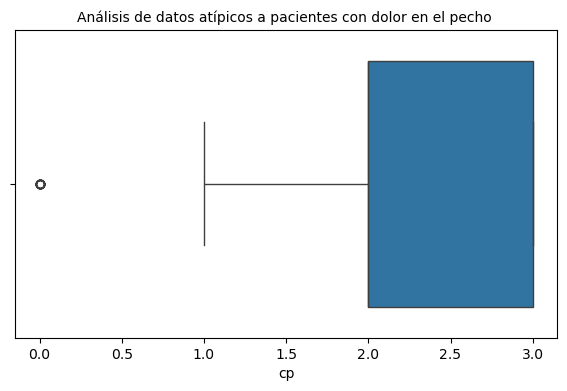

In [18]:
#Datos faltantes y atípicos 
plt.figure(figsize=(7, 4))
sns.boxplot(x=Datos['cp'])
plt.title('Análisis de datos atípicos a pacientes con dolor en el pecho ', fontsize=10 )

Text(0.5, 1.0, 'Análisis de datos atípicos a pacientes con cardiopatía ')

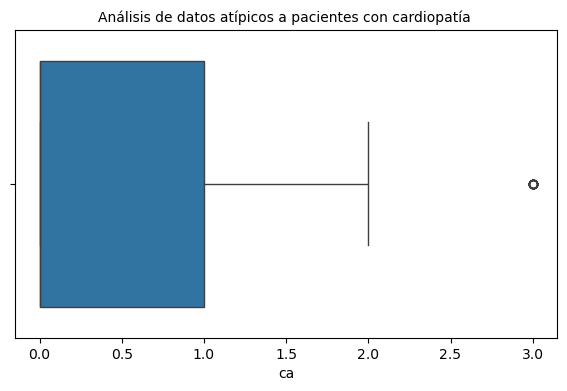

In [21]:
#Datos faltantes y atípicos 
plt.figure(figsize=(7, 4))
sns.boxplot(x=Datos['ca'])
plt.title('Análisis de datos atípicos a pacientes con cardiopatía ', fontsize=10 )

Text(0.5, 1.0, 'Análisis de datos atípicos a pacientes con condición en el estado de salud ')

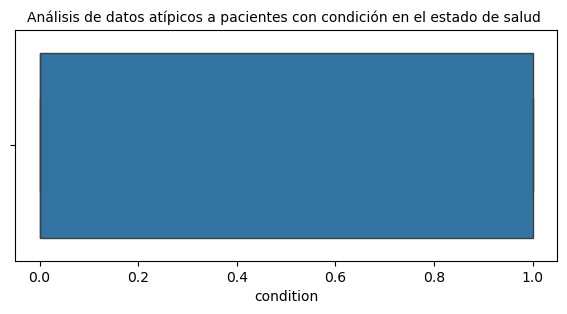

In [27]:
#Datos faltantes y atípicos 
plt.figure(figsize=(7, 3))
sns.boxplot(x=Datos['condition'])
plt.title('Análisis de datos atípicos a pacientes con condición en el estado de salud ', fontsize=10 )

In [2]:
#Revisión de datos faltantes

print("Numero de Registros con cero en fbs: ",heart_cleveland_upload'fbs'].isin([0]).sum())

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (2736040367.py, line 3)